# Probability Distributions

In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:

- `dteday` -- the date that we're looking at. 
- `cnt` -- the total number of bikes rented.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
bikes = pd.read_csv("bike_rental_day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Probablity of more than 5000 bike rides

prob_over_5000 = bikes[bikes['cnt']>5000].shape[0] / bikes.shape[0]
prob_over_5000

0.3912448700410397

### Computing the distribution

In [5]:
def combProb(n,k,p,q):
    prob = (math.factorial(n)) / (math.factorial(k) * math.factorial(n - k))
    count = (p ** k) * (q ** (n-k))
    return prob * count

In [6]:
# With an outcome being a day where there are more than 5000 riders, find the probability of k outcomes out of n events occurring.

outcome_probs = [combProb(30,i,0.39,0.61) for i in list(range(31))]
outcome_probs

[3.6299032553937196e-07,
 6.962273457066644e-06,
 6.454369901592111e-05,
 0.0003851460072425456,
 0.0016621260066655757,
 0.0055258877729799805,
 0.014720602673922079,
 0.03226811265290648,
 0.0593124939542154,
 0.09269602880276286,
 0.12445581572043082,
 0.1446729303456573,
 0.14645169588269408,
 0.12964576356828655,
 0.10065004829715923,
 0.06864003293707908,
 0.04114182302068777,
 0.021661943461230015,
 0.010002372800404023,
 0.004038921890068234,
 0.0014202438449502238,
 0.00043239273968039596,
 0.00011309228884338226,
 2.5149532515420715e-05,
 4.6897693829985355e-06,
 7.196105151617426e-07,
 8.847670268382081e-08,
 8.380306993731663e-09,
 5.740608420764663e-10,
 2.5311896937232547e-11,
 5.394338691541363e-13]

### Plotting the distribution

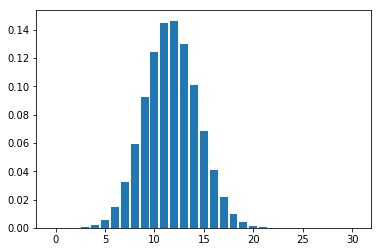

In [7]:
plt.bar(list(range(31)), outcome_probs)
plt.show()

### Computing the distribution using scipy

In [8]:
from scipy import linspace
from scipy.stats import binom

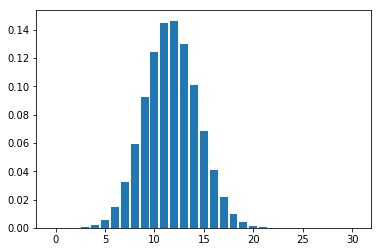

In [13]:
distribution = binom.pmf(linspace(0,30,31),30,0.39)
plt.bar(linspace(0,30,31),outcome_probs)
plt.show()

In [14]:
# Compute the mean and standard deviation for the bikesharing data, where N=30, and p=0.39

dist_mean = 30 * 0.39
print(dist_mean)

dist_std = math.sqrt(30 * 0.39 * 0.61)
print(dist_std)

11.700000000000001
2.671516423307182


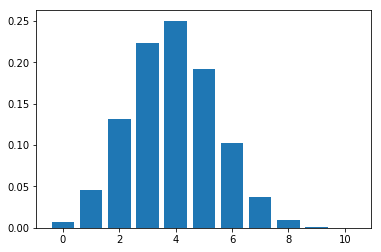

In [16]:
# Generate a binomial distribution, with N = 10, and p = 0.39

outcome_probs = [combProb(10,i,0.39,0.61) for i in list(range(11))]

distribution = binom.pmf(linspace(0,10,11),10,0.39)
plt.bar(linspace(0,10,11),outcome_probs)
plt.show()

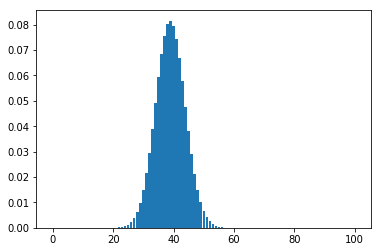

In [17]:
# Generate a binomial distribution, with N = 100, and p = 0.39

outcome_probs = [combProb(100,i,0.39,0.61) for i in list(range(101))]

distribution = binom.pmf(linspace(0,100,101),100,0.39)
plt.bar(linspace(0,100,101),outcome_probs)
plt.show()

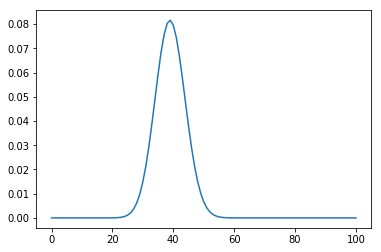

In [18]:
plt.plot(linspace(0,100,101),outcome_probs)
plt.show()

### Cumulative Density Function

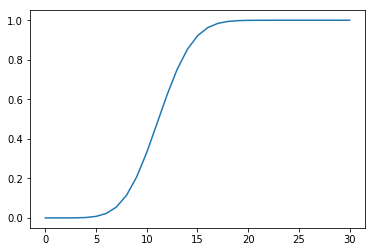

In [19]:
dist = binom.cdf(linspace(0,30,31),30,0.39)
plt.plot(linspace(0,30,31),dist)
plt.show()

In [20]:
# Find the probability to the left of k=16 (including 16) when N=30 and p=.39.
left_16 = binom.cdf(16,30,.39)
left_16

0.9623003766054883

In [21]:
# Find the probability to the right of k=16 when N=30 and p=.39. o Assign the result to right_16.
right_16=1-left_16
right_16

0.037699623394511717